In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [40]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [36]:
# To plot pretty figures directly within Jupyter
#%matplotlib inline
#import matplotlib as mpl
#mpl.rc('axes', labelsize=14)
#mpl.rc('xtick', labelsize=12)
#mpl.rc('ytick', labelsize=12)

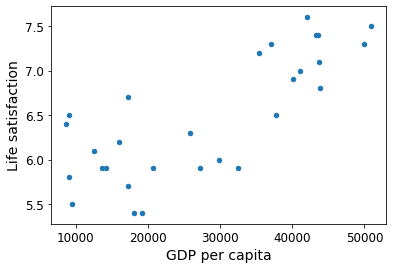

[[6.25984414]]


In [41]:
# Load data
bli = pd.read_csv("life_satisfaction.csv",thousands=',')
gdp = pd.read_csv('gdp_per_capita.csv',thousands=',',
                             encoding='latin1', na_values="n/a")

# Prepare data
country_stats = prepare_country_stats(bli,gdp)
country_stats.to_csv("Testdata.csv")
#country_stats
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

%matplotlib inline

country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select Model

model = sklearn.linear_model.LinearRegression()
model.fit(X,y)

new_X = [[22587]]

print(model.predict(new_X))